In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

import pickle
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import time
from tqdm.notebook import tqdm
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import datetime as dt
filterwarnings('ignore') 
from lightgbm import LGBMRegressor

In [2]:
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
def print_score(clf, X_train, y_train, X_test, y_test):

        print("Test Sonuçları:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test),digits=4)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
        
def withthreshold(clf, X_train, y_train, X_test, y_test,threshold):
    print("Test Sonuçları:\n")        
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, (clf.predict_proba(X_test)[:,1] >= threshold).astype(int))))
    print("Classification Report: \n {}\n".format(classification_report(y_test, (clf.predict_proba(X_test)[:,1] >= threshold).astype(int),digits=4)))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, (clf.predict_proba(X_test)[:,1] >= threshold).astype(int))))
        
def conf(model):
    f,ax = plt.subplots(figsize=(6,6))

    sns.heatmap(confusion_matrix(y_test,model.predict(X_test)), annot=True,cmap="Greens", fmt= '.0f',
                ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
    plt.xlabel("Predicted Label")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.ylabel("True Label")
    plt.title("Confusion Matrix", size = 12)

    plt.show()

In [3]:
pd.options.display.max_columns = 999

In [11]:
#df = pd.read_csv('modeldf3.csv',index_col=[0])
df = pd.read_csv('modeldf1.csv',index_col=[0])
df

,Home Team,Home ID,Away Team,Away ID,Home Goal,Away Goal,League,1_Home Games,1_Home Wins,1_Home Draws,1_Home Losing,1_Home Goals scored per game,1_Home Goals conceded per game,1_Home Clean sheets,1_Home both teams to score,1_Home TU 2.5,1_Home TO 2.5,1_Away Games,1_Away Wins,1_Away Draws,1_Away Losing,1_Away Goals scored per game,1_Away Goals conceded per game,1_Away Clean sheets,1_Away both teams to score,1_Away TU 2.5,1_Away TO 2.5,1_Home Shots,1_Home Shots (competitor),1_Home Shots on target,1_Home Shots on target (competitor),1_Home Possession,1_Home Possession (competitor),1_Home Corner,1_Home Corner (competitor),1_Home Yellow cards,1_Home Yellow cards (competitor),1_Home Red cards,1_Home Red cards (competitor),1_Away Shots,1_Away Shots (competitor),1_Away Shots on target,1_Away Shots on target (competitor),1_Away Possession,1_Away Possession (competitor),1_Away Corner,1_Away Corner (competitor),1_Away Yellow cards,1_Away Yellow cards (competitor),1_Away Red cards,1_Away Red cards (competitor),2_Home Games,2_Home Wins,2_Home Draws,2_Home Losing,2_Home Goals scored,2_Home Goals conceded,2_Home Goals scored per game,2_Home Goals conceded per game,2_Home Clean sheets,2_Home both teams to score,2_Home TU 2.5,2_Home TO 2.5,2_Away Games,2_Away Wins,2_Away Draws,2_Away Losing,2_Away Goals scored,2_Away Goals conceded,2_Away Goals scored per game,2_Away Goals conceded per game,2_Away Clean sheets,2_Away both teams to score,2_Away TU 2.5,2_Away TO 2.5,2_Home Shots,2_Home Shots (competitor),2_Home Shots on target,2_Home Shots on target (competitor),2_Home Possession,2_Home Possession (competitor),2_Home Corner,2_Home Corner (competitor),2_Home Yellow cards,2_Home Yellow cards (competitor),2_Home Red cards,2_Home Red cards (competitor),2_Away Shots,2_Away Shots (competitor),2_Away Shots on target,2_Away Shots on target (competitor),2_Away Possession,2_Away Possession (competitor),2_Away Corner,2_Away Corner (competitor),2_Away Yellow cards,2_Away Yellow cards (competitor),2_Away Red cards,2_Away Red cards (competitor),3_Home Games,3_Home Wins,3_Home Draws,3_Home Losing,3_Home Goals scored,3_Home Goals conceded,3_Home Goals scored per game,3_Home Goals conceded per game,3_Home Clean sheets,3_Home both teams to score,3_Home TU 2.5,3_Home TO 2.5,3_Away Games,3_Away Wins,3_Away Draws,3_Away Losing,3_Away Goals scored,3_Away Goals conceded,3_Away Goals scored per game,3_Away Goals conceded per game,3_Away Clean sheets,3_Away both teams to score,3_Away TU 2.5,3_Away TO 2.5,3_Home Shots,3_Home Shots (competitor),3_Home Shots on target,3_Home Shots on target (competitor),3_Home Possession,3_Home Possession (competitor),3_Home Corner,3_Home Corner (competitor),3_Home Yellow cards,3_Home Yellow cards (competitor),3_Home Red cards,3_Home Red cards (competitor),3_Away Shots,3_Away Shots (competitor),3_Away Shots on target,3_Away Shots on target (competitor),3_Away Possession,3_Away Possession (competitor),3_Away Corner,3_Away Corner (competitor),3_Away Yellow cards,3_Away Yellow cards (competitor),3_Away Red cards,3_Away Red cards (competitor),4_Home Games,4_Home Wins,4_Home Draws,4_Home Losing,4_Home Goals scored,4_Home Goals conceded,4_Home Goals scored per game,4_Home Goals conceded per game,4_Home Clean sheets,4_Home both teams to score,4_Home TU 2.5,4_Home TO 2.5,4_Away Games,4_Away Wins,4_Away Draws,4_Away Losing,4_Away Goals scored,4_Away Goals conceded,4_Away Goals scored per game,4_Away Goals conceded per game,4_Away Clean sheets,4_Away both teams to score,4_Away TU 2.5,4_Away TO 2.5,4_Home Shots,4_Home Shots (competitor),4_Home Shots on target,4_Home Shots on target (competitor),4_Home Possession,4_Home Possession (competitor),4_Home Corner,4_Home Corner (competitor),4_Home Yellow cards,4_Home Yellow cards (competitor),4_Home Red cards,4_Home Red cards (competitor),4_Away Shots,4_Away Shots (competitor),4_Away Shots on target,4_Away Shots on target (competitor),4_Away Possession,4_Away Possession (competitor),4_Away Corner,4_Away Corn

In [5]:
df[['Home ID','Away ID','Day','Month','Year','Hour','Minute','League','Round']] = df[['Home ID','Away ID','Day','Month','Year','Hour','Minute','League','Round']].astype('category')

In [6]:
df['UST'] = np.where(df['Home Goal'] + df['Away Goal'] > 2.5,1,0)
df['UST']=df['UST'].astype('category')
df['MS'] = np.where(df['Home Goal'] == df['Away Goal'],0,
        (np.where(df['Home Goal'] > df['Away Goal'],1,2)))
df['MS'] = df['MS'].astype('category')
df['BUST'] = np.where(df['Home Goal'] + df['Away Goal'] > 1.5,1,0)
df['BUST']= df['BUST'].astype('category')
df['UUST'] = np.where(df['Home Goal'] + df['Away Goal'] > 3.5,1,0)
df['UUST']= df['UUST'].astype('category')
df['BUSTX1'] = np.where((df['BUST'] == 1)&(df['MS'] != 2),1,0)
df['BUSTX2'] = np.where((df['BUST'] == 1)&(df['MS'] != 1),1,0)
df['UUSTX1'] = np.where((df['UUST'] == 0)&(df['MS'] != 2),1,0)
df['UUSTX2'] = np.where((df['UUST'] == 0)&(df['MS'] != 1),1,0)
df['HSUST'] =  np.where(df['Home Goal'] > 0.5,1,0)
df['HBUST'] =  np.where(df['Home Goal'] > 1.5,1,0)
df['HUST'] =  np.where(df['Home Goal'] > 2.5,1,0)
df['ASUST'] =  np.where(df['Away Goal'] > 0.5,1,0)
df['ABUST'] =  np.where(df['Away Goal'] > 1.5,1,0)
df['AUST'] =  np.where(df['Away Goal'] > 2.5,1,0)

df['UUST12'] = np.where((df['UUST'] == 0)&(df['MS'] != 0),1,0)
df['BUST12'] = np.where((df['BUST'] == 1)&(df['MS'] != 0),1,0)

df['X1'] = np.where(df['MS'] != 2,1,0)
df['X2'] = np.where(df['MS'] != 1,1,0)
df['12'] = np.where(df['MS'] != 0,1,0)
df['KG'] = np.where((df['Home Goal'] >= 1)&(df['Away Goal'] >= 1),1,0)
df['KG'] = df['KG'].astype('category')


In [7]:
df = df.dropna()

In [8]:
df = df.drop_duplicates()

In [10]:
df.to_csv('modeldata.csv')

In [185]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['BUSTX1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.5708

Classification Report: 
               precision    recall  f1-score   support

           0     0.5780    0.6132    0.5951       574
           1     0.5621    0.5258    0.5434       542

    accuracy                         0.5708      1116
   macro avg     0.5701    0.5695    0.5692      1116
weighted avg     0.5703    0.5708    0.5700      1116


Confusion Matrix: 
 [[352 222]
 [257 285]]



In [204]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.88)#%91/%89/%88

Test Sonuçları:

accuracy score: 0.5421

Classification Report: 
               precision    recall  f1-score   support

           0     0.5295    0.9843    0.6886       574
           1     0.8163    0.0738    0.1354       542

    accuracy                         0.5421      1116
   macro avg     0.6729    0.5291    0.4120      1116
weighted avg     0.6688    0.5421    0.4199      1116


Confusion Matrix: 
 [[565   9]
 [502  40]]



In [205]:
pickle.dump(lgbm_model,open('bustx1model.sav','wb'))

In [206]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['BUSTX2']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.6380

Classification Report: 
               precision    recall  f1-score   support

           0     0.6631    0.8284    0.7366       682
           1     0.5568    0.3387    0.4212       434

    accuracy                         0.6380      1116
   macro avg     0.6100    0.5836    0.5789      1116
weighted avg     0.6218    0.6380    0.6140      1116


Confusion Matrix: 
 [[565 117]
 [287 147]]



In [218]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.88)

Test Sonuçları:

accuracy score: 0.6156

Classification Report: 
               precision    recall  f1-score   support

           0     0.6139    1.0000    0.7607       682
           1     1.0000    0.0115    0.0228       434

    accuracy                         0.6156      1116
   macro avg     0.8069    0.5058    0.3918      1116
weighted avg     0.7640    0.6156    0.4738      1116


Confusion Matrix: 
 [[682   0]
 [429   5]]



In [219]:
pickle.dump(lgbm_model,open('bustx2model.sav','wb'))

In [228]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['UUSTX1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.5860

Classification Report: 
               precision    recall  f1-score   support

           0     0.5767    0.5725    0.5746       545
           1     0.5948    0.5989    0.5969       571

    accuracy                         0.5860      1116
   macro avg     0.5857    0.5857    0.5857      1116
weighted avg     0.5860    0.5860    0.5860      1116


Confusion Matrix: 
 [[312 233]
 [229 342]]



In [244]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.85)

Test Sonuçları:

accuracy score: 0.5027

Classification Report: 
               precision    recall  f1-score   support

           0     0.4954    0.9853    0.6593       545
           1     0.7500    0.0420    0.0796       571

    accuracy                         0.5027      1116
   macro avg     0.6227    0.5137    0.3695      1116
weighted avg     0.6257    0.5027    0.3627      1116


Confusion Matrix: 
 [[537   8]
 [547  24]]



In [245]:
pickle.dump(lgbm_model,open('uustx1model.sav','wb'))

In [260]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['UUSTX2']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.5851

Classification Report: 
               precision    recall  f1-score   support

           0     0.6103    0.7333    0.6662       630
           1     0.5320    0.3930    0.4521       486

    accuracy                         0.5851      1116
   macro avg     0.5712    0.5632    0.5591      1116
weighted avg     0.5762    0.5851    0.5729      1116


Confusion Matrix: 
 [[462 168]
 [295 191]]



In [262]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.80)

Test Sonuçları:

accuracy score: 0.5690

Classification Report: 
               precision    recall  f1-score   support

           0     0.5677    0.9921    0.7221       630
           1     0.6667    0.0206    0.0399       486

    accuracy                         0.5690      1116
   macro avg     0.6172    0.5063    0.3810      1116
weighted avg     0.6108    0.5690    0.4250      1116


Confusion Matrix: 
 [[625   5]
 [476  10]]



In [263]:
pickle.dump(lgbm_model,open('uustx2model.sav','wb'))

In [264]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['MS']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.4839

Classification Report: 
               precision    recall  f1-score   support

           0     0.3185    0.1541    0.2077       279
           1     0.5162    0.7267    0.6036       483
           2     0.4850    0.4124    0.4458       354

    accuracy                         0.4839      1116
   macro avg     0.4399    0.4311    0.4190      1116
weighted avg     0.4569    0.4839    0.4546      1116


Confusion Matrix: 
 [[ 43 163  73]
 [ 50 351  82]
 [ 42 166 146]]



In [278]:
threshold=0.96 # %96 %95 %93
print("Test Sonuçları:\n")        
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, (lgbm_model.predict_proba(X_test)[:,1] >= threshold).astype(int))))
print("Classification Report: \n {}\n".format(classification_report(y_test, (lgbm_model.predict_proba(X_test)[:,1] >= threshold).astype(int),digits=4)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, (lgbm_model.predict_proba(X_test)[:,1] >= threshold).astype(int))))

Test Sonuçları:

accuracy score: 0.2572

Classification Report: 
               precision    recall  f1-score   support

           0     0.2518    1.0000    0.4023       279
           1     1.0000    0.0166    0.0326       483
           2     0.0000    0.0000    0.0000       354

    accuracy                         0.2572      1116
   macro avg     0.4173    0.3389    0.1450      1116
weighted avg     0.4957    0.2572    0.1147      1116


Confusion Matrix: 
 [[279   0   0]
 [475   8   0]
 [354   0   0]]



In [284]:
pickle.dump(lgbm_model,open('msmodel.sav','wb'))

In [285]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['UST']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.5681

Classification Report: 
               precision    recall  f1-score   support

           0     0.5626    0.6602    0.6075       565
           1     0.5762    0.4737    0.5199       551

    accuracy                         0.5681      1116
   macro avg     0.5694    0.5669    0.5637      1116
weighted avg     0.5693    0.5681    0.5643      1116


Confusion Matrix: 
 [[373 192]
 [290 261]]



In [296]:
pickle.dump(lgbm_model,open('ustmodel.sav','wb'))

In [373]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12','KGVARX1','KGYOKX1','KGVARX2','KGYOKX2']
X = df.drop(bagimsiz,axis=1)
y = df['BUST']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.6980

Classification Report: 
               precision    recall  f1-score   support

           0     0.1935    0.0189    0.0344       318
           1     0.7124    0.9687    0.8210       798

    accuracy                         0.6980      1116
   macro avg     0.4530    0.4938    0.4277      1116
weighted avg     0.5646    0.6980    0.5969      1116


Confusion Matrix: 
 [[  6 312]
 [ 25 773]]



In [374]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.96)#%99,%98,%96

Test Sonuçları:

accuracy score: 0.3423

Classification Report: 
               precision    recall  f1-score   support

           0     0.2945    0.9371    0.4481       318
           1     0.8077    0.1053    0.1863       798

    accuracy                         0.3423      1116
   macro avg     0.5511    0.5212    0.3172      1116
weighted avg     0.6615    0.3423    0.2609      1116


Confusion Matrix: 
 [[298  20]
 [714  84]]



In [375]:
pickle.dump(lgbm_model,open('bustmodel.sav','wb'))

In [376]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12','KGVARX1','KGYOKX1','KGVARX2','KGYOKX2']
X = df.drop(bagimsiz,axis=1)
y = df['UUST']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.7428

Classification Report: 
               precision    recall  f1-score   support

           0     0.7489    0.9831    0.8501       828
           1     0.5172    0.0521    0.0946       288

    accuracy                         0.7428      1116
   macro avg     0.6330    0.5176    0.4724      1116
weighted avg     0.6891    0.7428    0.6552      1116


Confusion Matrix: 
 [[814  14]
 [273  15]]



In [377]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.06)#%98,%97,%94

Test Sonuçları:

accuracy score: 0.3978

Classification Report: 
               precision    recall  f1-score   support

           0     0.8047    0.2488    0.3801       828
           1     0.2767    0.8264    0.4146       288

    accuracy                         0.3978      1116
   macro avg     0.5407    0.5376    0.3974      1116
weighted avg     0.6684    0.3978    0.3890      1116


Confusion Matrix: 
 [[206 622]
 [ 50 238]]



In [378]:
pickle.dump(lgbm_model,open('uustmodel.sav','wb'))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

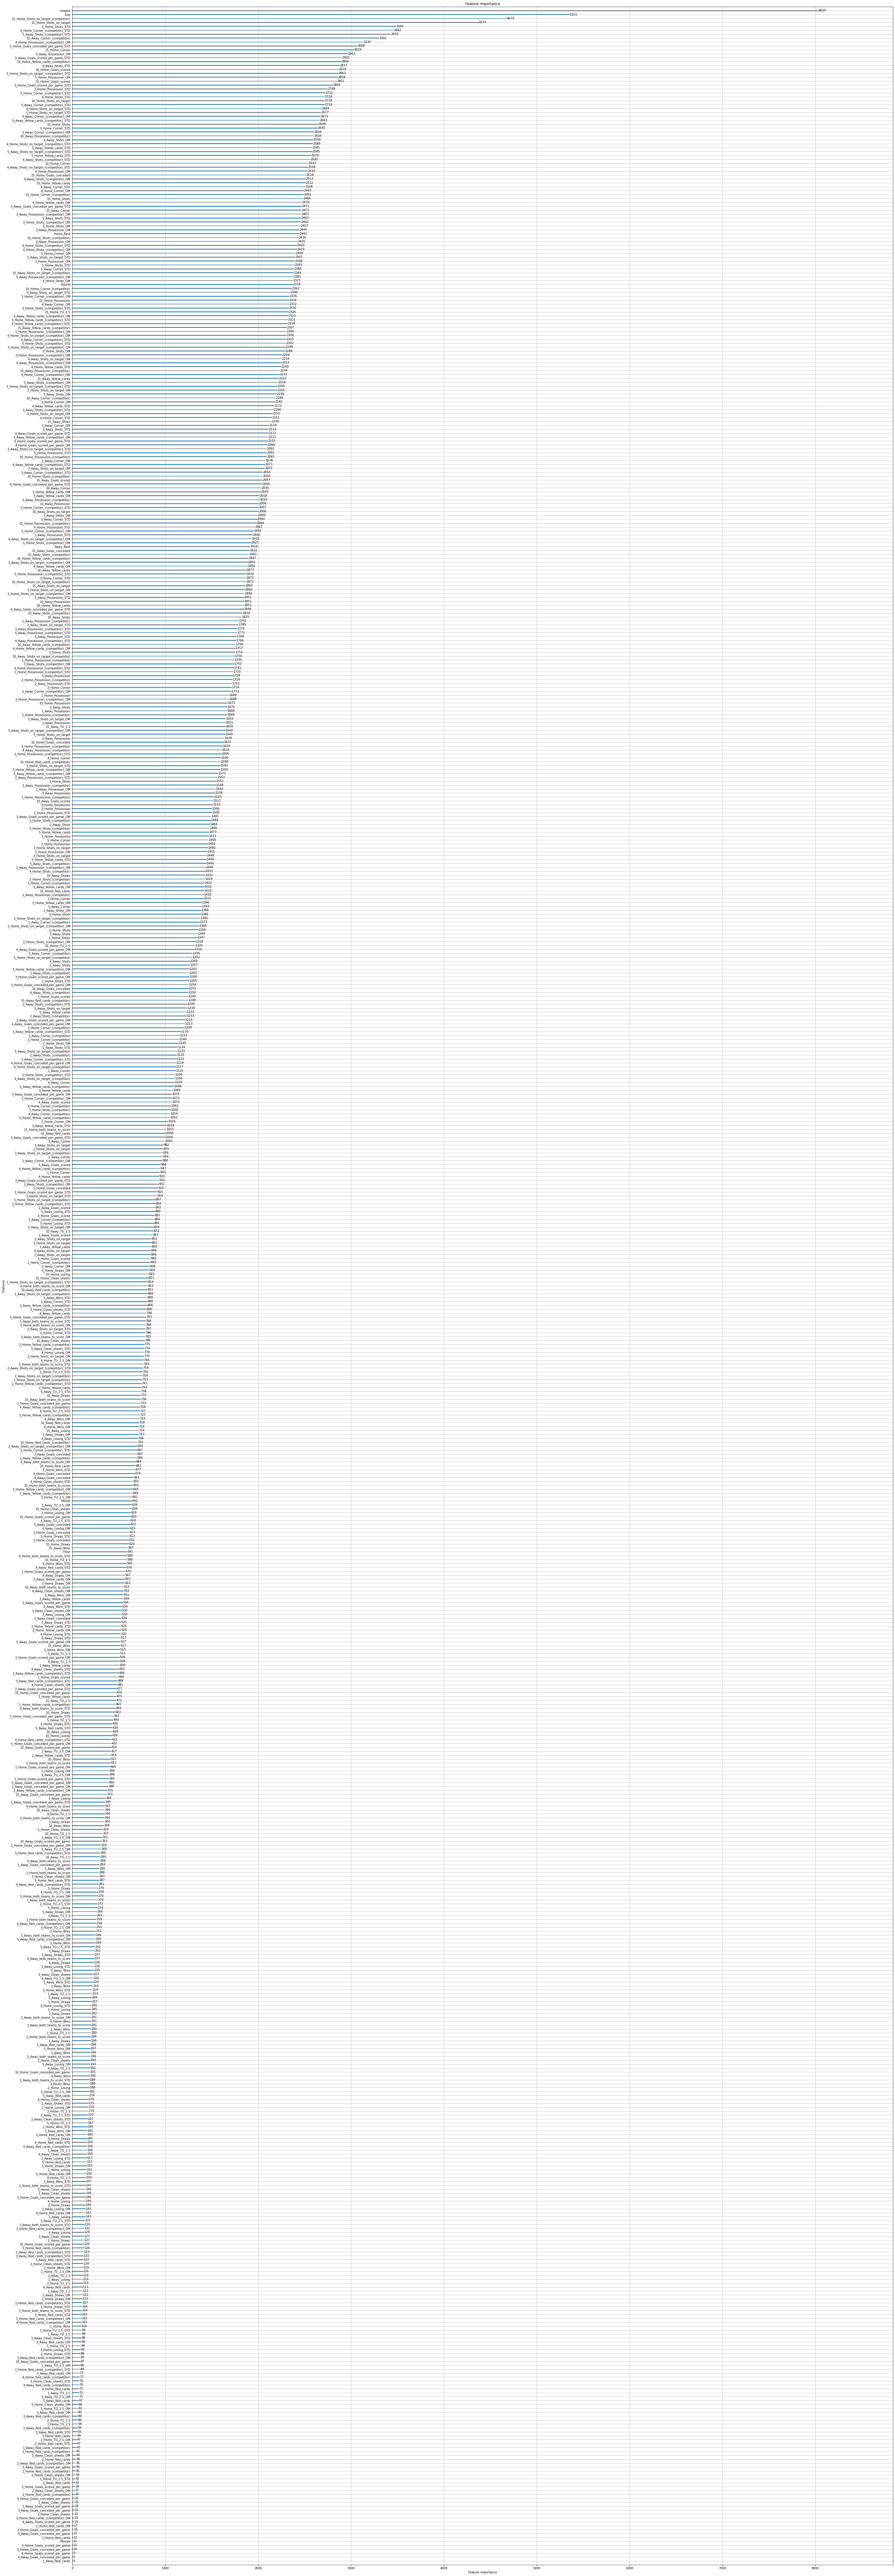

In [329]:
import lightgbm
lightgbm.plot_importance(lgbm_model,figsize=(50,160))

In [379]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12','KGVARX1','KGYOKX1','KGVARX2','KGYOKX2']
X = df.drop(bagimsiz,axis=1)
y = df['KG']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.5457

Classification Report: 
               precision    recall  f1-score   support

           0     0.5470    0.5597    0.5533       561
           1     0.5443    0.5315    0.5378       555

    accuracy                         0.5457      1116
   macro avg     0.5457    0.5456    0.5456      1116
weighted avg     0.5457    0.5457    0.5456      1116


Confusion Matrix: 
 [[314 247]
 [260 295]]



In [380]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.86)#%89,%88,%86

Test Sonuçları:

accuracy score: 0.5134

Classification Report: 
               precision    recall  f1-score   support

           0     0.5082    0.9947    0.6727       561
           1     0.8333    0.0270    0.0524       555

    accuracy                         0.5134      1116
   macro avg     0.6708    0.5108    0.3625      1116
weighted avg     0.6699    0.5134    0.3642      1116


Confusion Matrix: 
 [[558   3]
 [540  15]]



In [381]:
pickle.dump(lgbm_model,open('kgmodel.sav','wb'))

In [363]:
df['KGVARX1'] = np.where((df['KG'] == 1)&(df['MS'] != 2),1,0)
df['KGYOKX1'] = np.where((df['KG'] == 0)&(df['MS'] != 2),1,0)
df['KGVARX2'] = np.where((df['KG'] == 1)&(df['MS'] != 1),1,0)
df['KGYOKX2'] = np.where((df['KG'] == 0)&(df['MS'] != 1),1,0)


In [364]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12','KGVARX1','KGYOKX1','KGVARX2','KGYOKX2']
X = df.drop(bagimsiz,axis=1)
y = df['KGVARX1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.6362

Classification Report: 
               precision    recall  f1-score   support

           0     0.6607    0.9108    0.7659       729
           1     0.4144    0.1189    0.1847       387

    accuracy                         0.6362      1116
   macro avg     0.5376    0.5148    0.4753      1116
weighted avg     0.5753    0.6362    0.5643      1116


Confusion Matrix: 
 [[664  65]
 [341  46]]



In [369]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.85)#%89,%88,%86

Test Sonuçları:

accuracy score: 0.6532

Classification Report: 
               precision    recall  f1-score   support

           0     0.6532    1.0000    0.7902       729
           1     0.0000    0.0000    0.0000       387

    accuracy                         0.6532      1116
   macro avg     0.3266    0.5000    0.3951      1116
weighted avg     0.4267    0.6532    0.5162      1116


Confusion Matrix: 
 [[729   0]
 [387   0]]



In [382]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12','KGVARX1','KGYOKX1','KGVARX2','KGYOKX2']
X = df.drop(bagimsiz,axis=1)
y = df['KGYOKX1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.6685

Classification Report: 
               precision    recall  f1-score   support

           0     0.6799    0.9460    0.7912       741
           1     0.5294    0.1200    0.1957       375

    accuracy                         0.6685      1116
   macro avg     0.6047    0.5330    0.4934      1116
weighted avg     0.6293    0.6685    0.5911      1116


Confusion Matrix: 
 [[701  40]
 [330  45]]



In [384]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.75)#%89,%88,%86

Test Sonuçları:

accuracy score: 0.6658

Classification Report: 
               precision    recall  f1-score   support

           0     0.6667    0.9933    0.7978       741
           1     0.5833    0.0187    0.0362       375

    accuracy                         0.6658      1116
   macro avg     0.6250    0.5060    0.4170      1116
weighted avg     0.6387    0.6658    0.5419      1116


Confusion Matrix: 
 [[736   5]
 [368   7]]



In [393]:
df['EVH1'] = np.where((df['Home Goal'] - df['Away Goal']) > 1,1,0)
df['DEPH1'] = np.where((df['Away Goal'] - df['Home Goal']) > 1,1,0)
df['EVH2'] = np.where((df['Home Goal'] - df['Away Goal']) > 2,1,0)
df['DEPH2'] = np.where((df['Away Goal'] - df['Home Goal']) > 2,1,0)


In [396]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12','KGVARX1','KGYOKX1','KGVARX2','KGYOKX2','EVH1','DEPH1','EVH2','DEPH2','H1']
X = df.drop(bagimsiz,axis=1)
y = df['EVH1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.7975

Classification Report: 
               precision    recall  f1-score   support

           0     0.8013    0.9898    0.8856       884
           1     0.6250    0.0647    0.1172       232

    accuracy                         0.7975      1116
   macro avg     0.7131    0.5272    0.5014      1116
weighted avg     0.7646    0.7975    0.7259      1116


Confusion Matrix: 
 [[875   9]
 [217  15]]



In [407]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.02)#%993,98

Test Sonuçları:

accuracy score: 0.3772

Classification Report: 
               precision    recall  f1-score   support

           0     0.8921    0.2432    0.3822       884
           1     0.2354    0.8879    0.3722       232

    accuracy                         0.3772      1116
   macro avg     0.5638    0.5656    0.3772      1116
weighted avg     0.7556    0.3772    0.3801      1116


Confusion Matrix: 
 [[215 669]
 [ 26 206]]



In [408]:
pickle.dump(lgbm_model,open('evh1model.sav','wb'))

In [12]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['HSUST']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.7455

Classification Report: 
               precision    recall  f1-score   support

           0     0.5714    0.0418    0.0779       287
           1     0.7489    0.9891    0.8524       829

    accuracy                         0.7455      1116
   macro avg     0.6601    0.5155    0.4652      1116
weighted avg     0.7032    0.7455    0.6532      1116


Confusion Matrix: 
 [[ 12 275]
 [  9 820]]



In [15]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.98)#%99,%98

Test Sonuçları:

accuracy score: 0.3118

Classification Report: 
               precision    recall  f1-score   support

           0     0.2667    0.9582    0.4173       287
           1     0.8588    0.0881    0.1597       829

    accuracy                         0.3118      1116
   macro avg     0.5628    0.5231    0.2885      1116
weighted avg     0.7066    0.3118    0.2260      1116


Confusion Matrix: 
 [[275  12]
 [756  73]]



In [29]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.3)#%99,%98, ALT %70

Test Sonuçları:

accuracy score: 0.7437

Classification Report: 
               precision    recall  f1-score   support

           0     0.6000    0.0105    0.0205       287
           1     0.7444    0.9976    0.8526       829

    accuracy                         0.7437      1116
   macro avg     0.6722    0.5040    0.4366      1116
weighted avg     0.7072    0.7437    0.6386      1116


Confusion Matrix: 
 [[  3 284]
 [  2 827]]



In [30]:
pickle.dump(lgbm_model,open('hsust.sav','wb'))

In [31]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['HBUST']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.6326

Classification Report: 
               precision    recall  f1-score   support

           0     0.6497    0.8501    0.7365       674
           1     0.5684    0.3009    0.3935       442

    accuracy                         0.6326      1116
   macro avg     0.6090    0.5755    0.5650      1116
weighted avg     0.6175    0.6326    0.6007      1116


Confusion Matrix: 
 [[573 101]
 [309 133]]



In [55]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.84)#%92,%84, ALT %94,%90

Test Sonuçları:

accuracy score: 0.6174

Classification Report: 
               precision    recall  f1-score   support

           0     0.6136    0.9896    0.7575       674
           1     0.7586    0.0498    0.0934       442

    accuracy                         0.6174      1116
   macro avg     0.6861    0.5197    0.4255      1116
weighted avg     0.6710    0.6174    0.4945      1116


Confusion Matrix: 
 [[667   7]
 [420  22]]



In [56]:
pickle.dump(lgbm_model,open('hbust.sav','wb'))

In [57]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['HUST']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.8271

Classification Report: 
               precision    recall  f1-score   support

           0     0.8309    0.9924    0.9045       921
           1     0.5625    0.0462    0.0853       195

    accuracy                         0.8271      1116
   macro avg     0.6967    0.5193    0.4949      1116
weighted avg     0.7840    0.8271    0.7614      1116


Confusion Matrix: 
 [[914   7]
 [186   9]]



In [67]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.60)#%74,%60

Test Sonuçları:

accuracy score: 0.8289

Classification Report: 
               precision    recall  f1-score   support

           0     0.8294    0.9978    0.9059       921
           1     0.7500    0.0308    0.0591       195

    accuracy                         0.8289      1116
   macro avg     0.7897    0.5143    0.4825      1116
weighted avg     0.8155    0.8289    0.7579      1116


Confusion Matrix: 
 [[919   2]
 [189   6]]



In [68]:
pickle.dump(lgbm_model,open('hust.sav','wb'))

In [69]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['ASUST']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.6729

Classification Report: 
               precision    recall  f1-score   support

           0     0.5735    0.1040    0.1761       375
           1     0.6794    0.9609    0.7960       741

    accuracy                         0.6729      1116
   macro avg     0.6265    0.5324    0.4860      1116
weighted avg     0.6438    0.6729    0.5877      1116


Confusion Matrix: 
 [[ 39 336]
 [ 29 712]]



In [84]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.2)#%98 - %100,97-%94,96-%90 ALT%80-%66

Test Sonuçları:

accuracy score: 0.6649

Classification Report: 
               precision    recall  f1-score   support

           0     0.6667    0.0053    0.0106       375
           1     0.6649    0.9987    0.7983       741

    accuracy                         0.6649      1116
   macro avg     0.6658    0.5020    0.4044      1116
weighted avg     0.6655    0.6649    0.5336      1116


Confusion Matrix: 
 [[  2 373]
 [  1 740]]



In [86]:
pickle.dump(lgbm_model,open('asust.sav','wb'))

In [87]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['ABUST']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.6918

Classification Report: 
               precision    recall  f1-score   support

           0     0.7104    0.9380    0.8085       774
           1     0.4894    0.1345    0.2110       342

    accuracy                         0.6918      1116
   macro avg     0.5999    0.5362    0.5097      1116
weighted avg     0.6426    0.6918    0.6254      1116


Confusion Matrix: 
 [[726  48]
 [296  46]]



In [99]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.025)#%85-%100 , 74-%85 , ALT%97,5-%92, 97-%80

Test Sonuçları:

accuracy score: 0.3163

Classification Report: 
               precision    recall  f1-score   support

           0     0.9231    0.0155    0.0305       774
           1     0.3092    0.9971    0.4720       342

    accuracy                         0.3163      1116
   macro avg     0.6161    0.5063    0.2512      1116
weighted avg     0.7349    0.3163    0.1658      1116


Confusion Matrix: 
 [[ 12 762]
 [  1 341]]



In [100]:
pickle.dump(lgbm_model,open('abust.sav','wb'))

In [101]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['AUST']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.8844

Classification Report: 
               precision    recall  f1-score   support

           0     0.8848    0.9990    0.9384       984
           1     0.8000    0.0303    0.0584       132

    accuracy                         0.8844      1116
   macro avg     0.8424    0.5146    0.4984      1116
weighted avg     0.8748    0.8844    0.8343      1116


Confusion Matrix: 
 [[983   1]
 [128   4]]



In [102]:
pickle.dump(lgbm_model,open('aust.sav','wb'))

In [104]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['X1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.6989

Classification Report: 
               precision    recall  f1-score   support

           0     0.5900    0.1667    0.2599       354
           1     0.7096    0.9462    0.8110       762

    accuracy                         0.6989      1116
   macro avg     0.6498    0.5564    0.5355      1116
weighted avg     0.6717    0.6989    0.6362      1116


Confusion Matrix: 
 [[ 59 295]
 [ 41 721]]



In [132]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.35)#%99-%100 , 97-%94 , 94-%86 MS2 : %80-%85 , %70-%83,  %65-%75

Test Sonuçları:

accuracy score: 0.7016

Classification Report: 
               precision    recall  f1-score   support

           0     0.7561    0.0876    0.1570       354
           1     0.6995    0.9869    0.8187       762

    accuracy                         0.7016      1116
   macro avg     0.7278    0.5372    0.4878      1116
weighted avg     0.7175    0.7016    0.6088      1116


Confusion Matrix: 
 [[ 31 323]
 [ 10 752]]



In [ ]:
[bustx1,bustx2,uustx1,uustx2,ust,alt,bust,uust,kgvar,kgyok,hsust,hbust,hbalt,hust,asust,abust,abalt,aust,x1,ms2ters,x2,ms1ters]

In [133]:
pickle.dump(lgbm_model,open('x1model.sav','wb'))

In [134]:
bagimsiz = ['Home Goal','Away Goal','Home Team','Away Team','MS','UST','BUST','UUST','KG','BUSTX1','BUSTX2','UUSTX1','UUSTX2','HSUST','HBUST','HUST','ASUST','ABUST','AUST','UUST12','BUST12','X1','X2','12']
X = df.drop(bagimsiz,axis=1)
y = df['X2']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(learning_rate=0.0015,n_estimators=4000,
                            num_leaves=2000,max_depth=2000,
                            num_iterations=4000,n_jobs=-1).fit(X_train, y_train)
print_score(lgbm_model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.6210

Classification Report: 
               precision    recall  f1-score   support

           0     0.5920    0.3996    0.4771       483
           1     0.6329    0.7899    0.7027       633

    accuracy                         0.6210      1116
   macro avg     0.6125    0.5947    0.5899      1116
weighted avg     0.6152    0.6210    0.6051      1116


Confusion Matrix: 
 [[193 290]
 [133 500]]



In [158]:
withthreshold(lgbm_model,X_train, y_train, X_test, y_test,0.17)#%96-%100 , 92-%85 MS1 : %94-%100 , %83-%75

Test Sonuçları:

accuracy score: 0.5941

Classification Report: 
               precision    recall  f1-score   support

           0     0.7500    0.0932    0.1657       483
           1     0.5852    0.9763    0.7318       633

    accuracy                         0.5941      1116
   macro avg     0.6676    0.5347    0.4488      1116
weighted avg     0.6565    0.5941    0.4868      1116


Confusion Matrix: 
 [[ 45 438]
 [ 15 618]]



In [159]:
pickle.dump(lgbm_model,open('x2model.sav','wb'))